In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs-302-artificial-intelligence/CS 302 Artificial Intelligence.csv


In [66]:
features = pd.read_csv('/kaggle/input/cs-302-artificial-intelligence/CS 302 Artificial Intelligence.csv')
features.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,15.70,175,194,10,69,128,Good,26,17,Yes,No
1,5.46,188,34,0,199,97,Bad,56,16,No,No
2,11.00,200,89,14,426,79,Good,29,13,Yes,Yes
3,12.94,180,143,18,310,87,Medium,76,14,No,No
4,15.71,142,167,1,397,53,Good,39,15,No,Yes


In [67]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [68]:
print('The shape of our features is:', features.shape)

The shape of our features is: (400, 11)


In [69]:
features.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

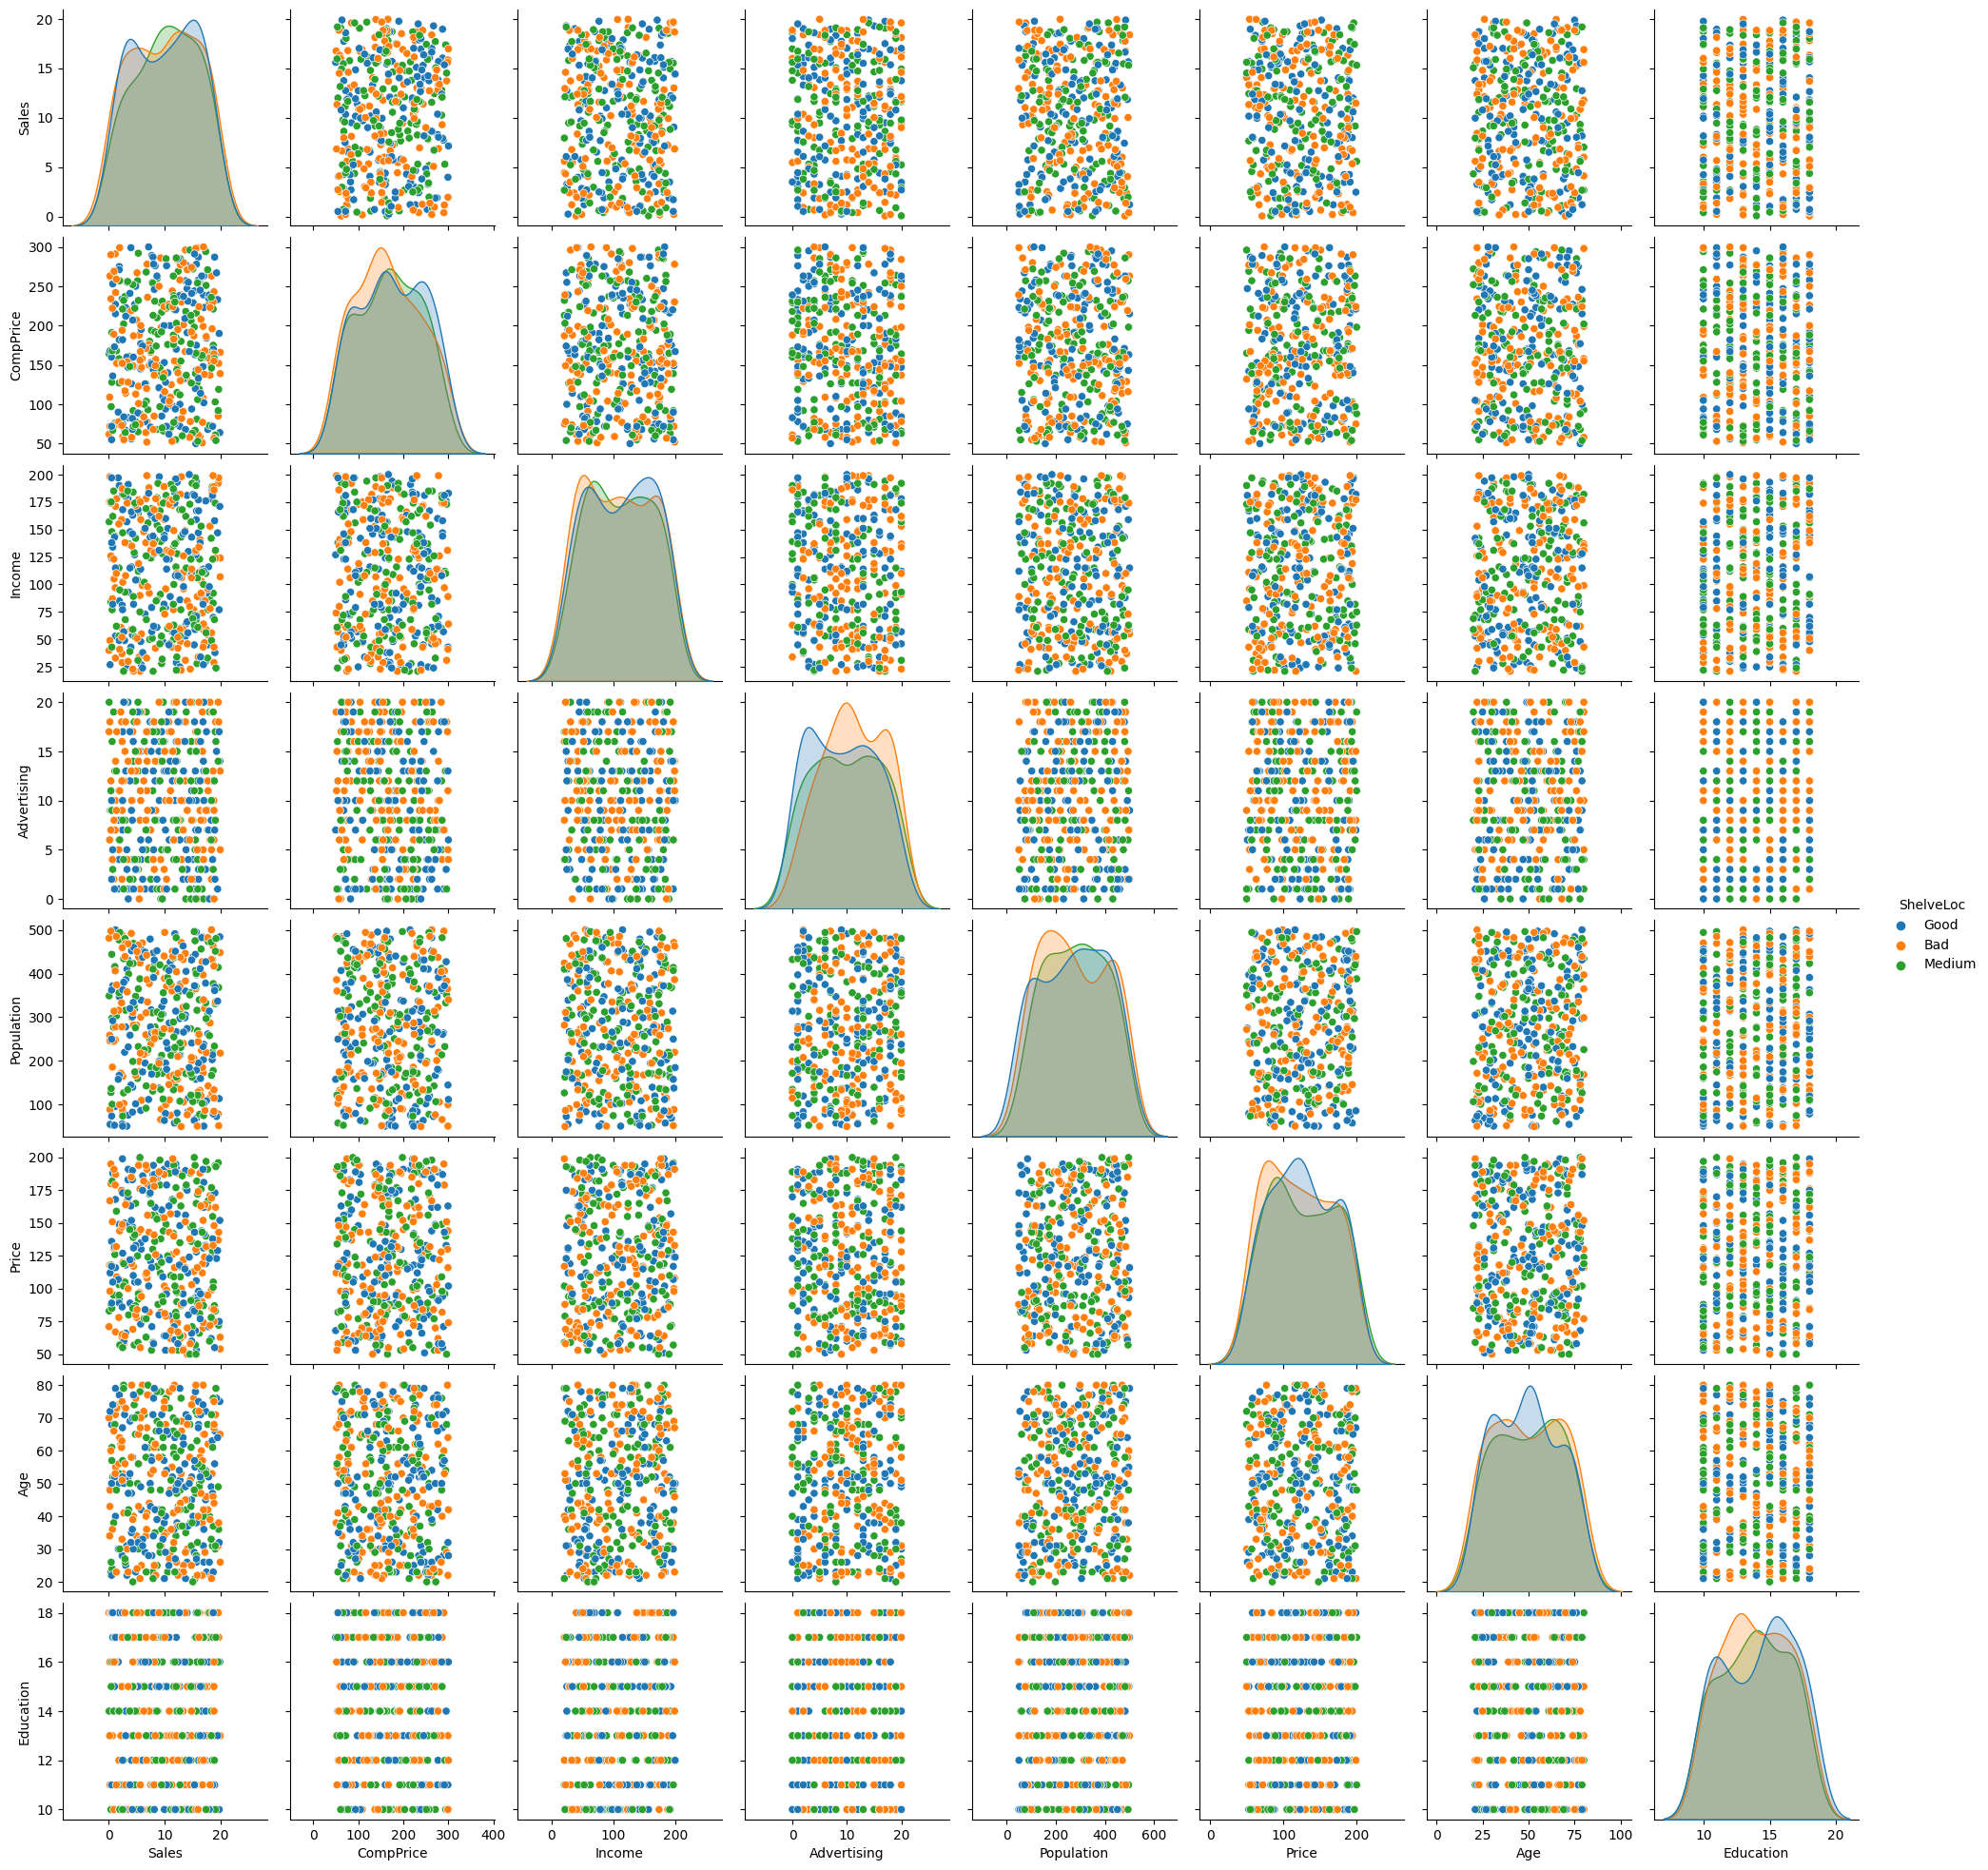

In [70]:
import seaborn as sns
sns.pairplot(data=features, hue = 'ShelveLoc')

In [71]:
df=pd.get_dummies(features,columns=['Urban','US'], drop_first=True)
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0  15.70        175     194           10          69    128      Good   26   
1   5.46        188      34            0         199     97       Bad   56   
2  11.00        200      89           14         426     79      Good   29   
3  12.94        180     143           18         310     87    Medium   76   
4  15.71        142     167            1         397     53      Good   39   

   Education  Urban_Yes  US_Yes  
0         17          1       0  
1         16          0       0  
2         13          1       1  
3         14          0       0  
4         15          0       1  


In [72]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0  15.70        175     194           10          69    128          1   26   
1   5.46        188      34            0         199     97          3   56   
2  11.00        200      89           14         426     79          1   29   
3  12.94        180     143           18         310     87          2   76   
4  15.71        142     167            1         397     53          1   39   

   Education  Urban_Yes  US_Yes  
0         17          1       0  
1         16          0       0  
2         13          1       1  
3         14          0       0  
4         15          0       1  


In [73]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,15.70,175,194,10,69,128
1,5.46,188,34,0,199,97
2,11.00,200,89,14,426,79
3,12.94,180,143,18,310,87
4,15.71,142,167,1,397,53
...,...,...,...,...,...,...
395,16.15,224,134,20,261,87
396,5.07,267,51,18,450,84
397,15.36,291,181,18,372,143
398,6.78,120,33,17,442,112


In [74]:
y

0      1
1      3
2      1
3      2
4      1
      ..
395    3
396    3
397    1
398    3
399    2
Name: ShelveLoc, Length: 400, dtype: int64

In [75]:
df['ShelveLoc'].unique()

array([1, 3, 2])

In [76]:
df.ShelveLoc.value_counts()

3    138
1    135
2    127
Name: ShelveLoc, dtype: int64

In [77]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [78]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,10.120425,170.470000,110.435000,10.15000,275.812500,124.485000,2.007500,49.600000,14.012500,0.495000,0.50750
std,5.781774,70.796713,52.954047,5.96754,130.746756,44.202255,0.827136,17.796116,2.552181,0.500601,0.50057
min,0.050000,50.000000,21.000000,0.00000,50.000000,50.000000,1.000000,20.000000,10.000000,0.000000,0.00000
25%,5.050000,111.750000,60.750000,5.00000,167.750000,87.000000,1.000000,34.000000,12.000000,0.000000,0.00000
50%,10.355000,166.500000,111.000000,10.00000,274.000000,122.000000,2.000000,50.000000,14.000000,0.000000,1.00000
75%,15.322500,230.250000,159.000000,15.00000,391.000000,164.000000,3.000000,65.000000,16.000000,1.000000,1.00000
max,19.970000,300.000000,200.000000,20.00000,500.000000,200.000000,3.000000,80.000000,18.000000,1.000000,1.00000


In [79]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,15.70,175,194,10,69,128,1,26,17,1,0
1,5.46,188,34,0,199,97,3,56,16,0,0
2,11.00,200,89,14,426,79,1,29,13,1,1
3,12.94,180,143,18,310,87,2,76,14,0,0
4,15.71,142,167,1,397,53,1,39,15,0,1


In [82]:
labels = np.array(df['Income'])
features= df.drop('Income', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [83]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [84]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (300, 11)
Training Labels Shape: (300,)
Testing Features Shape: (100, 11)
Testing Labels Shape: (100,)


In [85]:
baseline_preds = test_features[:, feature_list.index('Sales')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  102.52


In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [87]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.5 degrees.


In [88]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.4 %.


In [92]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [94]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [99]:

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Income               Importance: 1.0
Variable: Sales                Importance: 0.0
Variable: CompPrice            Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: Price                Importance: 0.0
Variable: ShelveLoc            Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0
Variable: US_Yes               Importance: 0.0


In [97]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('Sales'), feature_list.index('Income')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.36 degrees.
Accuracy: 99.57 %.


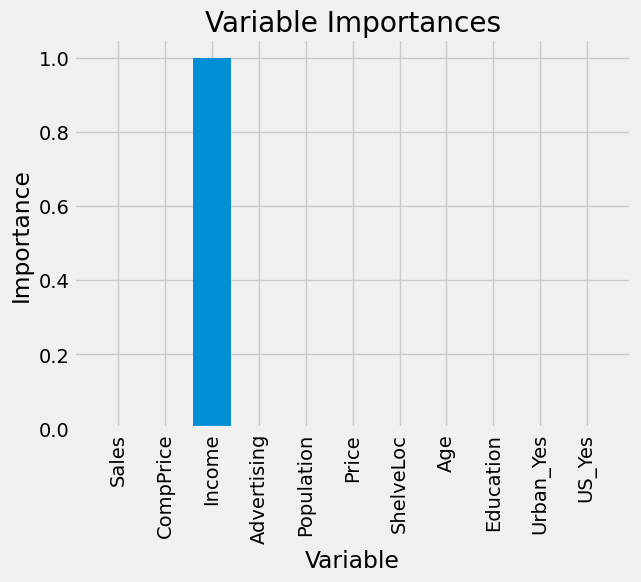

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');